# Logistic Regression

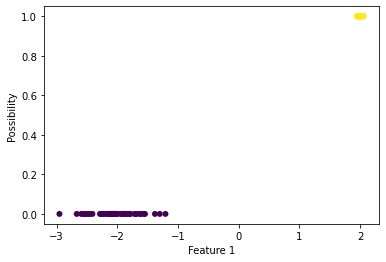

In [1]:
# try a sample

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#自己創造一個練習的 Dataset
X, y = make_classification(n_samples=100, 
                           n_classes=2,
                           n_features=1, 
                           n_informative=1, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep = 2.0,         #群要分多開
                           random_state=10)
plt.scatter(X, y, marker='o', c=y,linewidth=0, edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Possibility')
plt.show()

In [9]:
#給你看一下y，就是兩個類別
y

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)

## Logit Function - 將odds取對數值

Text(0, 0.5, 'Logit - L')

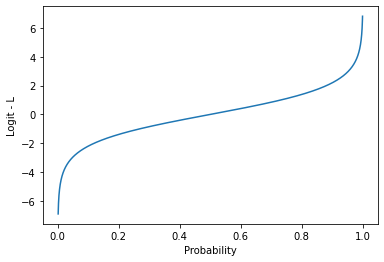

In [2]:
# 用 log( x / (1 - x) ) 近似


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def logit(x):
    return np.log( x / (1 - x) )

x = np.arange(0.001,0.999, 0.0001)
y = [logit(n) for n in x]
plt.plot(x,y)
plt.xlabel("Probability")
plt.ylabel("Logit - L")
#0-1的機率對應的對數值

Text(0, 0.5, 'Probability')

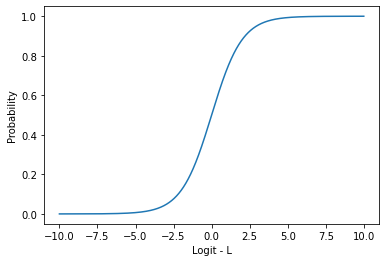

In [3]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Logit - L")
plt.ylabel("Probability")
#現在變成回歸機率對數值所對應的機率數字

## <span style="color:red"> 再把公式改寫一下

-----
當我們把L替換成ax+b，你應該知道了吧! 我們要用ax+b估算勝率的對數值，讓他符合應該出現的機率

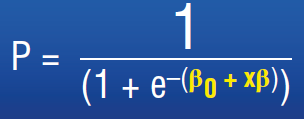

### 乳腺癌資料集 Breast Cancer Wisconsin (Diagnostic) Data Set

In [4]:
#下載資料集
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## <span style="color:red">Plotting the Features in 2D 

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

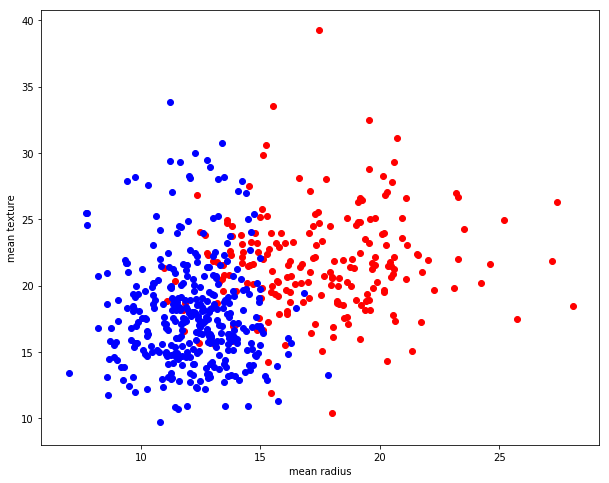

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d list---
X = []
for target in range(2):                     # target is 0 or 1  # 0: malignant(惡性的), 1: benign(良性)
    X.append([[], []])                      # 因為我們有良性和惡性兩種資料，所以每跑一個新的for迴圈，就要在X裡面新做一個儲存空間
    for i in range(len(cancer.data)):              
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # first feature - mean radius
            X[target][1].append(cancer.data[i][1]) # second feature — mean texture

#print(X[0][0])
#print(X[0][1])
#print(X[1][0])
#print(X[1][1])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


In [8]:
# 如果上面碼看不懂，看下面

X = []
for target in range(2):                     
    X.append([[], []])

print(X)

[[[], []], [[], []]]


## Plotting in 3D-嘗試畫一下3個feature的關係圖

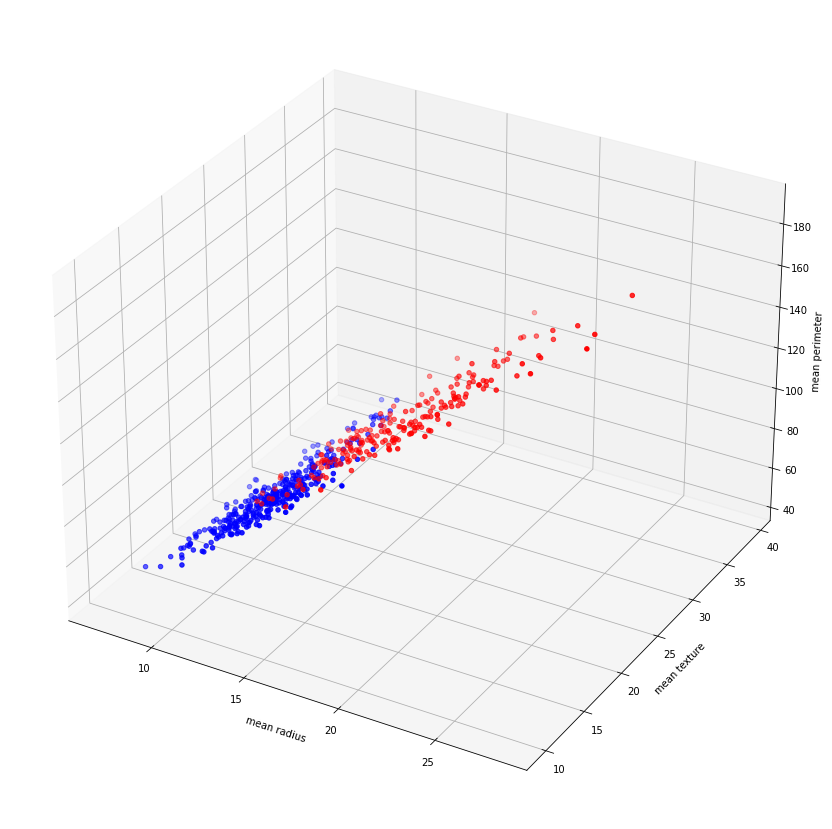

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#---copy from dataset into a 2-d array---
X = []
for target in range(2):
    X.append([[], [], []])
    for i in range(len(cancer.data)):    # target is 0,1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            X[target][2].append(cancer.data[i][2])

colours = ("r", "b")   # r: malignant, b: benign
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
for target in range(2):
    ax.scatter(X[target][0],
               X[target][1],
               X[target][2],
               c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()


## <span style="color:red">Training Using One Feature

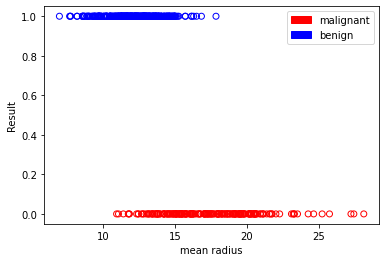

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()   # Load dataset
x = cancer.data[:,0]            # 取mean radius這個feature
y = cancer.target               # 0: malignant(惡性的), 1: benign(良性)
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign

plt.scatter(x,y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            )

plt.xlabel("mean radius")
plt.ylabel("Result")

#做legend的內容
red   = mpatches.Patch(color='red',   label='malignant')
blue  = mpatches.Patch(color='blue',  label='benign')

plt.legend(handles=[red, blue], loc=1)


### <span style="color:red">Finding the Intercept and Coefficient

In [13]:
x

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
       13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
       12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
       19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
       12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
       17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
       11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
       12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
       12.18 ,  9.787, 11.6  , 14.42 , 13.61 ,  6.981, 12.18 ,  9.876,
       10.49 , 13.11 , 11.64 , 12.36 , 22.27 , 11.34 ,  9.777, 12.63 ,
      

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
from sklearn import linear_model
import numpy as np

log_regress = linear_model.LogisticRegression()

#---train the model---
log_regress.fit(X = np.array(x).reshape(-1,1),
                y = y)

#---print trained model intercept---
print(log_regress.intercept_)     # [ 8.19393897]

#---print trained model coefficients---
print(log_regress.coef_)          # [[-0.54291739]]


[15.120902]
[[-1.02475609]]


### Plotting the Sigmoid Curve

Text(0, 0.5, 'Probability')

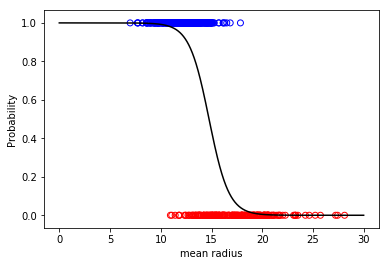

In [12]:
def sigmoid(x):
    return (1 / (1 +
        np.exp(-(log_regress.intercept_[0] +
        (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

#這是原本的scatter圖
plt.scatter(x,y,
    facecolors='none',
    edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
    )

#這是我們的預測線
plt.plot(x1,y1,'k')
plt.xlabel("mean radius")
plt.ylabel("Probability")


## 把模型預測看看

In [13]:
#測試一下，半徑20
print(log_regress.predict_proba([[20]])) # [[0.93489354 0.06510646]]=>[[malignant(惡性的) benign(良性)]]
print(log_regress.predict([[20]])[0])    # 0=>malignant(惡性的)


[[0.99538685 0.00461315]]
0


In [14]:
#測試一下，半徑8
print(log_regress.predict_proba([[8]]))  # [[0.02082411 0.97917589]]=>[[malignant(惡性的) benign(良性)]]
print(log_regress.predict([[8]])[0])     # 1=>benign(良性)


[[9.84046071e-04 9.99015954e-01]]
1


## Training the Model Using All Features

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()        # Load dataset

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              cancer.data,               # features
                              cancer.target,             # labels
                              test_size = 0.25,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = cancer.target)  # randomize based on labels


## stratify的意思

---

stratify參數可以讓資料集切割的時候，樣本數比例會和原本資料集比例一樣。

舉例來說，比如有一個變數y，他是一個二元類別，0有25%，1有75%，stratify=y會讓切割後的結果維持這個比例。


In [27]:
from sklearn import linear_model
x = train_set[:,0:30]         # 取全部的特徵
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression(max_iter=10000)
log_regress.fit(X = x,
                y = y)


LogisticRegression(max_iter=10000)

In [28]:
print(log_regress.intercept_)     #
print(log_regress.coef_)          #


[36.34463114]
[[ 0.69897844  0.28382651 -0.39823237  0.03407153 -0.09496101 -0.13022513
  -0.37405546 -0.20241186 -0.25205369 -0.0068123  -0.09996708  0.86656736
   0.37369696 -0.14685338 -0.01133805  0.04007365 -0.03400737 -0.0327032
  -0.02585863  0.0049517   0.30485163 -0.50703645 -0.12098976 -0.01367441
  -0.21721384 -0.569818   -1.17496269 -0.50365243 -0.70099798 -0.06375087]]


### Testing the Model

In [19]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
#先把惡性和良性的機率算出來
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
#幫上面的結果加個欄位名
preds_prob.columns = ["Malignant", "Benign"]

#---get the predicted class labels---
#把預測結果算出來
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
#把實際結果也準備出來
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
#把三個部分堆起來
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())


   Malignant        Benign  Prediction  Original Result
0   0.999835  1.645514e-04           0                0
1   0.999749  2.513106e-04           0                0
2   0.172634  8.273659e-01           1                1
3   1.000000  5.688532e-09           0                0
4   0.089730  9.102700e-01           1                0


### 進階分析-Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

# (row, column)決定你的Confusion Matrix的方向
confusion_matrix(test_labels,preds)

array([[48,  5],
       [ 4, 86]], dtype=int64)

In [21]:
#可以轉置，會影響分析，要小心
confusion_matrix(preds,test_labels)

array([[48,  4],
       [ 5, 86]], dtype=int64)

In [22]:
#四個值 分離出來
tn, fp, fn, tp=confusion_matrix(test_labels,preds).ravel()
(tn, fp, fn, tp)

(48, 5, 4, 86)

## 上面數據的解釋

In [1]:
#               Prediction
#        TN(48)             FP(5)    
#Actual
#        FN(4)              TP(86)

##  Accuracy-在所有情況中，正確判斷真假的比例。

----
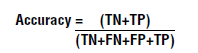

In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels,preds)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 93.7%


In [5]:
###                     Prediction
###                "TN(48)"             FP(5)    
###  Actual
###                FN(4)              "TP(86)"

##  Precision-判斷為真的情況下，有多少是真的真。

----
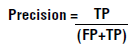

In [2]:
###                     Prediction
###                TN(48)              "FP(5)"   
###  Actual
###                FN(4)              "TP(86)"

In [25]:
from sklearn.metrics import precision_score
pre=precision_score(test_labels,preds)
print('accuracy = {:.1f}%'.format(pre*100))

accuracy = 94.5%


##  Recall-為positive的情況下，有多少被正確判斷出來。
##  True Positive Rate (TPR)


In [4]:
###                     Prediction
###                TN(48)             FP(5)    
###  Actual
###               "FN(4)              TP(86)"

In [26]:
from sklearn.metrics import recall_score
rec=recall_score(test_labels,preds)
print('accuracy = {:.1f}%'.format(rec*100))

accuracy = 95.6%


##  False Positive Rate (FPR)-為negative的情況下，有多少點被誤判為positive。

## FP / (FP+TN).



In [3]:
###                     Prediction
###                "TN(48)"           "FP(5)"   
###  Actual
###                FN(4)              TP(86)

In [6]:
#　全部 RECALL

In [28]:
from sklearn.metrics import classification_report
report=classification_report(test_labels,preds)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

